In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
# Data processing and loading
Car_data= pd.read_csv('/content/Car_price _details.csv')

In [ ]:
# inspecting the first 5 rows of the dataset
Car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
# inspecting the last 5 Rows of the dataset
Car_data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
# Total number of the data points
Car_data.shape

(4340, 8)

In [ ]:
# Details of the dataset
Car_data.info

<bound method DataFrame.info of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission      

In [ ]:
# Checking the number of missed values
Car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
# checking the distribution of the data
print(Car_data.fuel.value_counts())
print(Car_data.seller_type.value_counts())
print(Car_data.transmission.value_counts())
print(Car_data.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [ ]:
# encoding the categorical data
Car_data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
Car_data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
Car_data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
Car_data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [ ]:
Car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [ ]:
# spliting the data
x = Car_data.drop(['name','selling_price'],axis=1)
y = Car_data['selling_price']

In [ ]:
# Cross checking does the columns are dropped or not
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            0             0      0
1     2007      50000     0            0             0      0
2     2012     100000     1            0             0      0
3     2017      46000     0            0             0      0
4     2014     141000     1            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            0             0      1
4336  2014      80000     1            0             0      1
4337  2009      83000     0            0             0      1
4338  2016      90000     1            0             0      0
4339  2016      40000     0            0             0      0

[4340 rows x 6 columns]


In [ ]:
# Cross checking does the column is dropped or not
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [ ]:
# spliting the data into training and testing
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
# If x_train has fewer samples than y_train, drop rows from y_train
if len(x_train) < len(y_train):
    y_train = y_train.iloc[:len(x_train)]
# If x_train has more samples than y_train, drop rows from x_train
elif len(x_train) > len(y_train):
    x_train = x_train.iloc[:len(y_train)]

In [ ]:
# building the model
model = Lasso()

In [ ]:
# To fit the model
model.fit(x_train, y_train)

Lasso()

In [ ]:
# model evaluation
Training_data_prediction = model.predict(x_train)

In [ ]:
# R squared error
error_score = metrics.r2_score(y_train,Training_data_prediction)
print("R squared error :",error_score)

R squared error : 0.42832288942328445


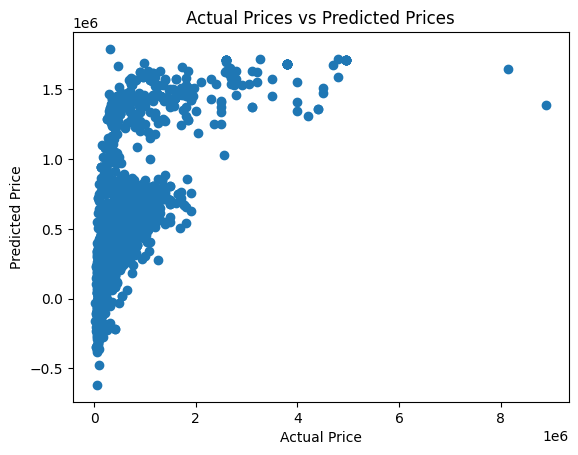

In [ ]:
# Visualize the actual prices and predicted prices
plt.scatter(y_train, Training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# model evaluation
Test_data_prediction = model.predict(x_test)

In [ ]:
# R squared error
error_score = metrics.r2_score(y_test,Test_data_prediction)
print("R squared error :",error_score)

R squared error : 0.49180025422174856


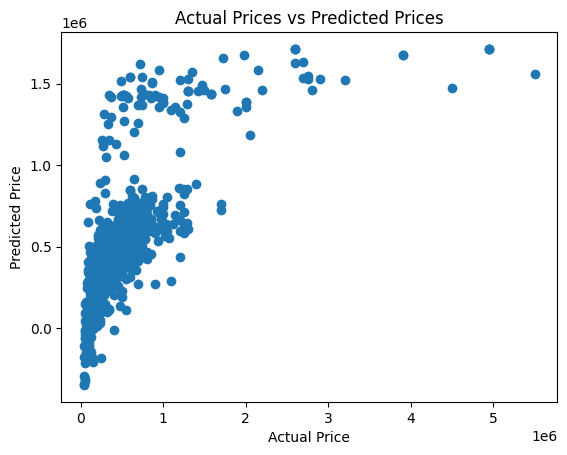

In [ ]:
# Visualize the actual prices and predicted prices
plt.scatter(y_test, Test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()